In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [5]:
data = pd.read_csv('../Data.csv')
data = data[['RecoDatapT','RecoDataeta','RecoDataphi','RecoDatam']]
data.head()

,RecoDatapT,RecoDataeta,RecoDataphi,RecoDatam
0,40.3892,3.41479,1.47023,12.53740
1,40.3892,3.41479,1.47023,12.53740
2,29.3586,-1.17862,1.84039,9.95503
3,20.9593,2.13374,-2.86886,9.55921
4,35.2909,2.96499,1.36464,10.69580


In [6]:
data.columns = ['realpT','realeta','realphi','realm']
data.head()

,realpT,realeta,realphi,realm
0,40.3892,3.41479,1.47023,12.53740
1,40.3892,3.41479,1.47023,12.53740
2,29.3586,-1.17862,1.84039,9.95503
3,20.9593,2.13374,-2.86886,9.55921
4,35.2909,2.96499,1.36464,10.69580


In [7]:
data.shape

(100000, 4)

In [9]:
predicted_pt=pd.read_csv('../predicted_data/consecutive/RecoDatapT_predicted_consecutive.csv')['RecoDatapT_predicted']
predicted_eta=pd.read_csv('../predicted_data/consecutive/RecoDataeta_predicted_consecutive.csv')['RecoDataeta_predicted']
predicted_phi=pd.read_csv('../predicted_data/consecutive/RecoDataphi_predicted_consecutive.csv')['RecoDataphi_predicted']
predicted_m=pd.read_csv('../predicted_data/consecutive/RecoDatam_predicted_consecutive.csv')['RecoDatam_predicted']
predicted=pd.concat([predicted_pt, predicted_eta, predicted_phi, predicted_m],axis=1)
predicted.columns=['predicted_pT','predicted_eta','predicted_phi','predicted_m']
predicted.head()

,predicted_pT,predicted_eta,predicted_phi,predicted_m
0,24.607350,-3.350608,-2.091106,9.677951
1,21.360770,-1.814661,-3.081051,5.220784
2,29.479628,-3.688439,1.382808,5.921267
3,28.382595,-1.707020,-2.617420,8.397436
4,29.682281,-1.263203,2.356002,5.311636


In [10]:
predicted.shape

(20000, 4)

In [11]:
bins_pt=[10, 15, 20, 25, 30, 35, 40, 50, 70, 100, 150, 200, 300]
bins_eta=[-4, -3.5, -3.1, -3, -2.75, -2.5, -2.25, -2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.1, 3.5, 4, 5]
bins_phi=np.linspace(-3.4,3.4,50)


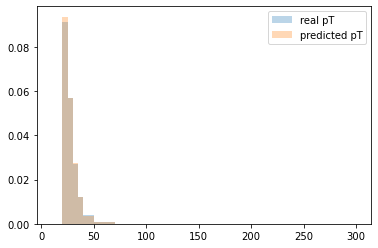

In [22]:
# fig, ax = plt.subplots(1,4, figsize=(10,10))
# ax = ax.flatten()
range_pt=(20,60)
plt.hist(data['realpT'],bins=bins_pt,label='real pT',alpha=0.3,density=True,range=range_pt)
plt.hist(predicted['predicted_pT'],bins=bins_pt,label='predicted pT',alpha=0.3,density=True,range=range_pt)
plt.legend()

In [ ]:
gen_data = pd.read_csv('../Data.csv')
gen_data=gen_data[['genDatapT','genDataeta','genDataphi','genDatam']]
gen_data.head()

,genDatapT,genDataeta,genDataphi,genDatam
0,45.4608,3.379820,1.470130,13.24440
1,56.2643,0.811412,-1.324120,10.55060
2,34.6377,-1.131020,1.801820,7.65844
3,27.4120,-2.842550,0.345529,5.18675
4,30.3263,3.040300,1.341270,5.74890


In [42]:
eta_counts, eta_bins=np.histogram(gen_data['genDataeta'],bins=[-4, -3.5, -3.1, -3, -2.75, -2.5, -2.25, -2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.1, 3.5, 4, 5])
eta_bins

array([-4.  , -3.5 , -3.1 , -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75,
       -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
        0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,
        3.  ,  3.1 ,  3.5 ,  4.  ,  5.  ])

In [38]:
eta_bins.shape, eta_counts.shape

((32,), (31,))

In [41]:
list(eta_counts).append(0)

In [ ]:
range_phi=(-3.4,3.4)
plt.hist(data['realphi'],bins=100,label='real eta',alpha=0.3,density=True,range=range_pt)
plt.hist(predicted['predicted_eta'],bins=100,label='predicted eta',alpha=0.3,density=True,range=range_eta)
plt.legend()

In [27]:
FIELDS  = {'RecoDatapT' : {
                           'xlabel': r'$p_T$ (GeV)', 
                           'xmin': 0, 
                           'xmax':80},
           
           'RecoDataeta': {
                           'xlabel': r'$\eta$', 
                           'xmin'  : -8, 
                           'xmax'  :  8},
           
           'RecoDataphi': {
                           'xlabel': r'$\phi$',
                           'xmin'  : -4,
                           'xmax'  :  4},
           
           'RecoDatam'  : {
                           'xlabel': r'$m$ (GeV)',
                           'xmin'  : 0, 
                           'xmax'  :20}
          }

predicted_data_path='../predicted_data/consecutive/'
def plot_all(data_df, label='consecutive'):
    data = pd.read_csv(data_df)
    data = data[['RecoDatapT','RecoDataeta','RecoDataphi','RecoDatam']]
    data.columns = ['realpT','realeta','realphi','realm']
    predicted_pt=pd.read_csv(predicted_data_path+'RecoDatapT_predicted_'+label+'.csv')['RecoDatapT_predicted']
    predicted_eta=pd.read_csv(predicted_data_path+'RecoDataeta_predicted_'+label+'.csv')['RecoDataeta_predicted']
    predicted_phi=pd.read_csv(predicted_data_path+'RecoDataphi_predicted_'+label+'.csv')['RecoDataphi_predicted']
    predicted_m=pd.read_csv(predicted_data_path+'RecoDatam_predicted_'+label+'.csv')['RecoDatam_predicted']
    predicted=pd.concat([predicted_pt, predicted_eta, predicted_phi, predicted_m],axis=1)
    predicted.columns=['predicted_pT','predicted_eta','predicted_phi','predicted_m']
    
    fig,ax = plt.subplots(2,2,figsize=(10,10))
    ax=ax.flatten()
    ax[0].hist(data['realpT'],bins=bins_pt,label='real pT',alpha=0.3,density=True,range=(FIELDS['RecoDatapT']['xmin'],FIELDS['RecoDatapT']['xmax']))
    ax[0].hist(predicted_pt,bins=bins_pt,label='IQN',alpha=0.3,density=True,range=(FIELDS['RecoDatapT']['xmin'],FIELDS['RecoDatapT']['xmax']))

    ax[1].hist(data['realeta'],bins=bins_eta,label='real eta',alpha=0.3,density=True,range=(FIELDS['RecoDataeta']['xmin'],FIELDS['RecoDataeta']['xmax']))
    ax[1].hist(predicted_eta,bins=bins_eta,label='IQN',alpha=0.3,density=True,range=(FIELDS['RecoDataeta']['xmin'],FIELDS['RecoDataeta']['xmax']))


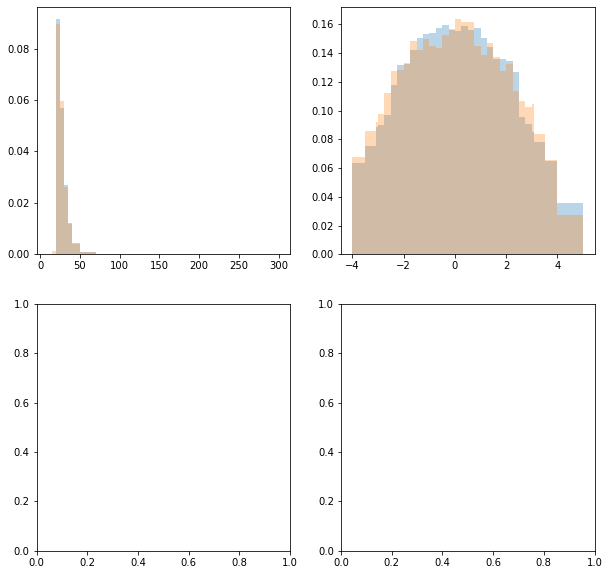

In [28]:
data_df='../Data.csv'
plot_all(data_df,label='consecutive')

/home/ali/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


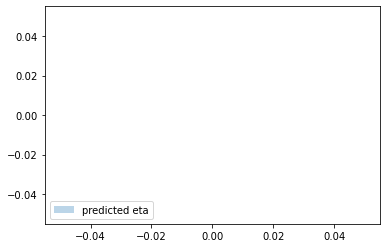

In [19]:
# fig, ax = plt.subplots(1,4, figsize=(10,10))
# ax = ax.flatten()
range_eta=(-4,4)
plt.hist(data['realeta'],bins=100,label='real eta',alpha=0.3,density=True,range=range_pt)
plt.hist(predicted['predicted_eta'],bins=100,label='predicted eta',alpha=0.3,density=True,range=range_eta)
plt.legend()

In [25]:
from scipy.special import rel_entr
KLD = rel_entr(data['realpT'][:20000],predicted['predicted_pT'])
print('KL= ',sum(KLD))

KL=  37881.05159382759


In [26]:
KLD = rel_entr(predicted['predicted_pT'],data['realpT'][:20000])
print('KL= ',sum(KLD))

KL=  30578.59136264614


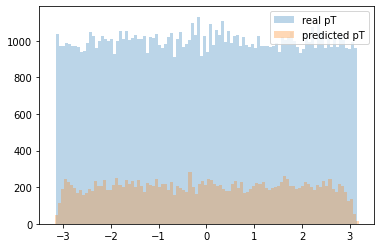

In [16]:
plt.hist(data['realphi'],bins=100,label='real pT',alpha=0.3)
plt.hist(predicted['predicted_phi'],bins=100,label='predicted pT',alpha=0.3)
plt.legend()